In [1]:
'''
Boston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
Data has white spaces, not commas.
    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's
'''

"\nBoston housing dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html\nData has white spaces, not commas.\n    1. CRIM      per capita crime rate by town\n    2. ZN        proportion of residential land zoned for lots over \n                 25,000 sq.ft.\n    3. INDUS     proportion of non-retail business acres per town\n    4. CHAS      Charles River dummy variable (= 1 if tract bounds \n                 river; 0 otherwise)\n    5. NOX       nitric oxides concentration (parts per 10 million)\n    6. RM        average number of rooms per dwelling\n    7. AGE       proportion of owner-occupied units built prior to 1940\n    8. DIS       weighted distances to five Boston employment centres\n    9. RAD       index of accessibility to radial highways\n    10. TAX      full-value property-tax rate per $10,000\n    11. PTRATIO  pupil-teacher ratio by town\n    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks \n                 by town\n    13. LSTAT  

<h4>Import Data

In [2]:
import numpy as np
import pandas as pd

In [3]:
# load data and arrange into Pandas dataframe
df = pd.read_csv("boston.csv", delim_whitespace=True, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<h4>Investigation

In [4]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.columns = feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe().round(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,4.0,11.0,11.0,0.0,1.0,6.0,69.0,4.0,10.0,408.0,18.0,357.0,13.0,23.0
std,9.0,23.0,7.0,0.0,0.0,1.0,28.0,2.0,9.0,169.0,2.0,91.0,7.0,9.0
min,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,1.0,187.0,13.0,0.0,2.0,5.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,45.0,2.0,4.0,279.0,17.0,375.0,7.0,17.0
50%,0.0,0.0,10.0,0.0,1.0,6.0,78.0,3.0,5.0,330.0,19.0,391.0,11.0,21.0
75%,4.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,17.0,25.0
max,89.0,100.0,28.0,1.0,1.0,9.0,100.0,12.0,24.0,711.0,22.0,397.0,38.0,50.0


<AxesSubplot:>

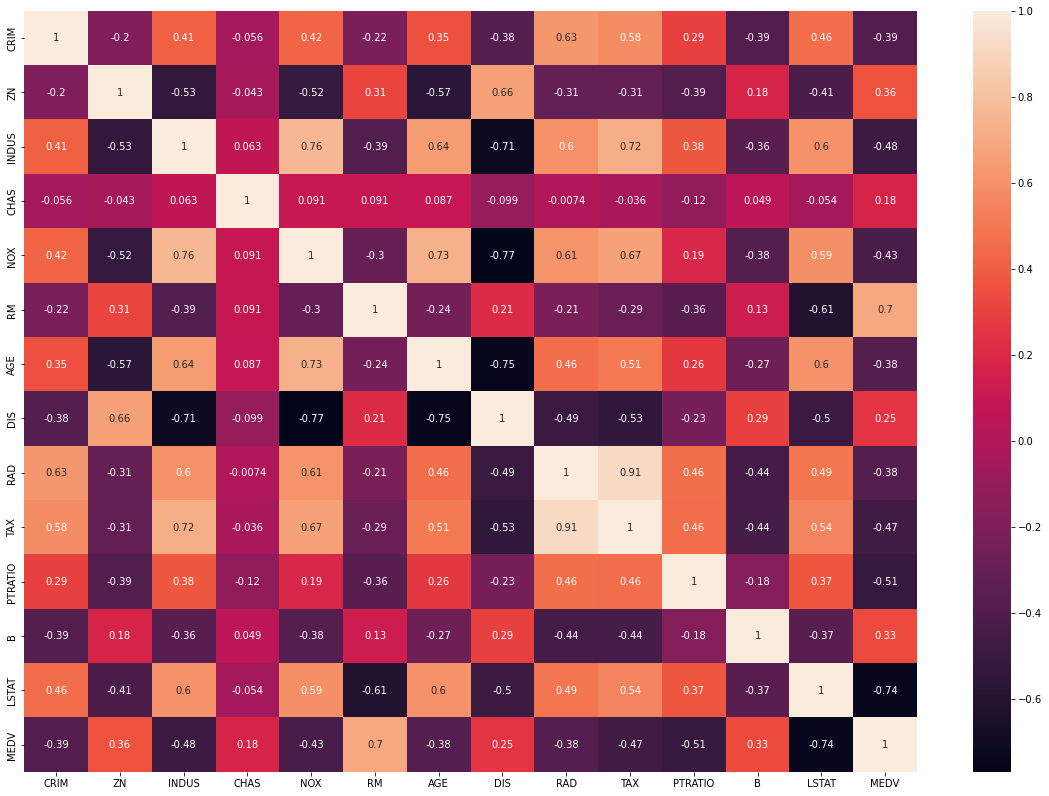

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

# Check Correlation Among the Features
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.isnull().sum().sort_values(ascending=False)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<h4>Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

#Split into features and target (Price)
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [9]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaled_var = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)], axis=0).describe().round(0)

In [11]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

scaled_var.columns = features
scaled_var

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.0,-1.0,-2.0,-0.0,-1.0,-4.0,-2.0,-1.0,-1.0,-1.0,-3.0,-4.0,-1.0
25%,-0.0,-1.0,-1.0,-0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,0.0,-1.0
50%,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-1.0,-0.0,0.0,0.0,-0.0
75%,0.0,0.0,1.0,-0.0,1.0,0.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0
max,10.0,4.0,2.0,4.0,3.0,3.0,1.0,4.0,2.0,2.0,2.0,0.0,3.0


<h4>Neural Network

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [13]:
# Model 1
model1 = keras.models.Sequential([
    keras.layers.Dense(130, input_shape = (13,), activation="sigmoid"),
    keras.layers.Dense(60, activation="sigmoid"),
    keras.layers.Dense(1)
])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 130)               1820      
                                                                 
 dense_1 (Dense)             (None, 60)                7860      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 9,741
Trainable params: 9,741
Non-trainable params: 0
_________________________________________________________________


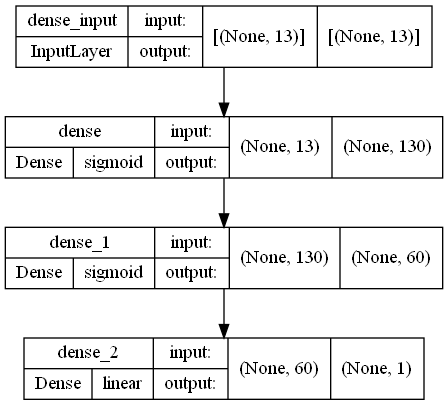

In [14]:
keras.utils.plot_model(model1, "model1.png", show_shapes=True, show_layer_activations=True)

In [15]:
model1.compile(loss='mse', optimizer='adam', metrics=['mae'])
history1 = model1.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=50, epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 19ms/step - loss: 562.2075 - mae: 21.7938 - val_loss: 584.2559 - val_mae: 22.0717
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 509.7246 - mae: 20.5706 - val_loss: 533.6500 - val_mae: 20.9060
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 464.6570 - mae: 19.4605 - val_loss: 491.6448 - val_mae: 19.8920
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 428.2501 - mae: 18.5187 - val_loss: 458.6844 - val_mae: 19.0603
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 400.0026 - mae: 17.7562 - val_loss: 433.4206 - val_mae: 18.3964
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 378.7397 - mae: 17.1435 - val_loss: 413.5661 - val_mae: 17.8555
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 361.3945 - mae: 16.6479 - val_loss: 397.7997 - val_mae: 17.4113
Epoch 8/100
7/7 [==============================] - 0s 

7/7 [==============================] - 0s 5ms/step - loss: 106.7979 - mae: 7.0455 - val_loss: 128.9633 - val_mae: 8.0942
Epoch 62/100
7/7 [==============================] - 0s 5ms/step - loss: 105.0494 - mae: 6.9546 - val_loss: 127.0373 - val_mae: 8.0065
Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 103.4091 - mae: 6.8675 - val_loss: 125.1242 - val_mae: 7.9188
Epoch 64/100
7/7 [==============================] - 0s 5ms/step - loss: 101.8078 - mae: 6.7831 - val_loss: 123.2328 - val_mae: 7.8310
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 100.1786 - mae: 6.6950 - val_loss: 121.4585 - val_mae: 7.7457
Epoch 66/100
7/7 [==============================] - 0s 5ms/step - loss: 98.6777 - mae: 6.6145 - val_loss: 119.7182 - val_mae: 7.6623
Epoch 67/100
7/7 [==============================] - 0s 5ms/step - loss: 97.1781 - mae: 6.5349 - val_loss: 118.0548 - val_mae: 7.5831
Epoch 68/100
7/7 [==============================] - 0s 5ms/step - loss: 95.78

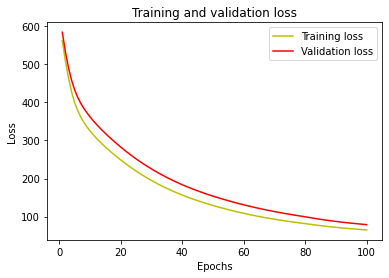

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

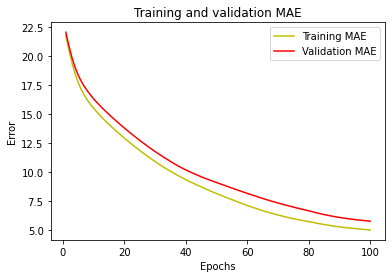

In [17]:
acc = history1.history['mae']
val_acc = history1.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [18]:
mse_neural, mae_neural = model1.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 48.2741 - mae: 4.2625
Mean squared error from neural net:  48.27410888671875
Mean absolute error from neural net:  4.262458801269531


In [19]:
# Model 2
model2 = Sequential()
model2.add(Dense(128, input_dim=13, activation='relu'))
model2.add(Dense(64, activation='relu'))
#Output layer
model2.add(Dense(1, activation='linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


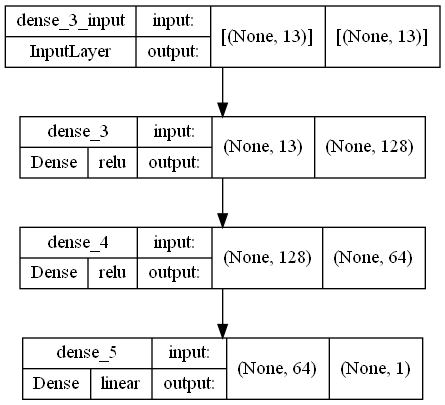

In [20]:
keras.utils.plot_model(model2, "model2.png", show_shapes=True, show_layer_activations=True)

In [21]:
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
history2 = model2.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=50, epochs=100)

Epoch 1/100
7/7 [==============================] - 0s 16ms/step - loss: 586.4521 - mae: 22.3428 - val_loss: 617.2924 - val_mae: 22.7590
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 545.6750 - mae: 21.3610 - val_loss: 573.8441 - val_mae: 21.7780
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 505.6419 - mae: 20.3802 - val_loss: 527.1118 - val_mae: 20.6771
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 460.9543 - mae: 19.2433 - val_loss: 470.4934 - val_mae: 19.2734
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 406.4401 - mae: 17.8171 - val_loss: 401.4126 - val_mae: 17.5617
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 340.3046 - mae: 16.0684 - val_loss: 321.1778 - val_mae: 15.4872
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 268.5119 - mae: 14.0382 - val_loss: 234.2135 - val_mae: 13.1198
Epoch 8/100
7/7 [==============================] - 0s 

Epoch 63/100
7/7 [==============================] - 0s 5ms/step - loss: 10.4320 - mae: 2.2280 - val_loss: 11.4810 - val_mae: 2.6811
Epoch 64/100
7/7 [==============================] - 0s 5ms/step - loss: 10.3400 - mae: 2.2348 - val_loss: 11.3354 - val_mae: 2.6723
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 10.2680 - mae: 2.2284 - val_loss: 11.4203 - val_mae: 2.6805
Epoch 66/100
7/7 [==============================] - 0s 5ms/step - loss: 10.1671 - mae: 2.2107 - val_loss: 11.2272 - val_mae: 2.6558
Epoch 67/100
7/7 [==============================] - 0s 5ms/step - loss: 10.0690 - mae: 2.1974 - val_loss: 11.2618 - val_mae: 2.6603
Epoch 68/100
7/7 [==============================] - 0s 5ms/step - loss: 9.9962 - mae: 2.1815 - val_loss: 11.3192 - val_mae: 2.6717
Epoch 69/100
7/7 [==============================] - 0s 5ms/step - loss: 9.9114 - mae: 2.1751 - val_loss: 11.3813 - val_mae: 2.6692
Epoch 70/100
7/7 [==============================] - 0s 5ms/step - loss: 9.8480

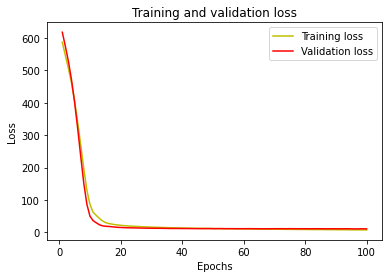

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

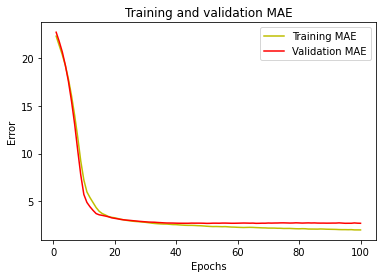

In [23]:
acc = history2.history['mae']
val_acc = history2.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [24]:
mse_neural, mae_neural = model2.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 14.7645 - mae: 2.8664
Mean squared error from neural net:  14.76447868347168
Mean absolute error from neural net:  2.8663597106933594


In [25]:
#Predict on test data
predictions = model2.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

Predicted values are:  [[17.287708]
 [20.20534 ]
 [20.327658]
 [19.307539]
 [12.417835]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: MEDV, dtype: float64


<h4>Classical Machine Learning

In [26]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.495351975931676
Mean absolute error from linear regression:  3.055894153890959


In [28]:
### Decision tree
tree = DecisionTreeRegressor(criterion="squared_error")
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  26.717549019607848
Mean absolute error using decision tree:  3.3970588235294112


In [29]:
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 30, random_state=30)
rf.fit(X_train_scaled, y_train)

y_pred_RF = rf.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

Mean squared error using Random Forest:  12.701104793028327
Mean absolute error Using Random Forest:  2.408235294117647
